In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [88]:
#import kagglehub

# Download latest version
#file_path = kagglehub.dataset_download("camnugent/california-housing-prices")

#print("Path to dataset files:", file_path)

In [89]:
file_path = "/home/eder/Documentos/Projetos/Python/Jupyter/001 - CaliforniaHousing_caseStudy/LinearRegression_CaliforniaHousing/Data/Raw/housing.csv"

In [90]:
data = pd.read_csv(file_path)

In [91]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [93]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [94]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [95]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

##Data Exploration

###Missing data analysis

In [96]:
#Check for missing values
missing_values = data.isnull().sum()

#Calulate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100 

#Display the missing data statistics
print("Missing Values in each column:\n", missing_values)
print("percentage of missing data:\n", missing_percentage)

Missing Values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
percentage of missing data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [97]:
#Remove rows with missing values
data_cleaned = data.dropna()

#Verify that the missing values have been removed
print("Missing values in each column after removal:")
print(data_cleaned.isnull().sum())

Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


##Data Exploration and Visualization

In [98]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


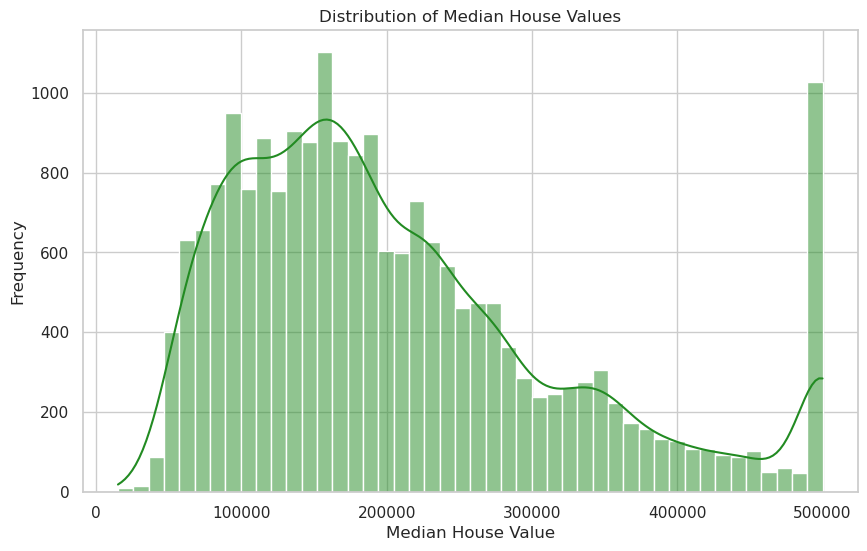

In [99]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

##Using InterQuartile Range to remove Outliers

In [100]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("Data shape without outliers:", data_no_outliers_1.shape)

Original data shape: (20433, 10)
Data shape without outliers: (19369, 10)


##BoxPlot for Outlier Detection

###Outliers in Median Income

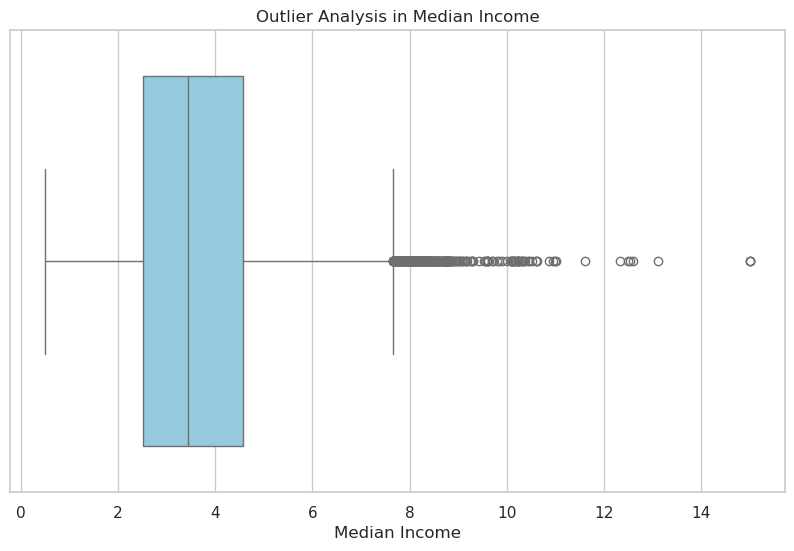

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='skyblue')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [102]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [103]:
data = data_no_outliers_2

In [104]:
# Unique value count for categorical data
for column in ['ocean_proximity']: 
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


##String Data Categorization to Dummy Variables

In [105]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity', dtype='int')
data = pd.concat([data.drop('ocean_proximity',axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [106]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data = data.drop('ocean_proximity_ISLAND', axis=1)

In [107]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0


##Correlation HeatMap

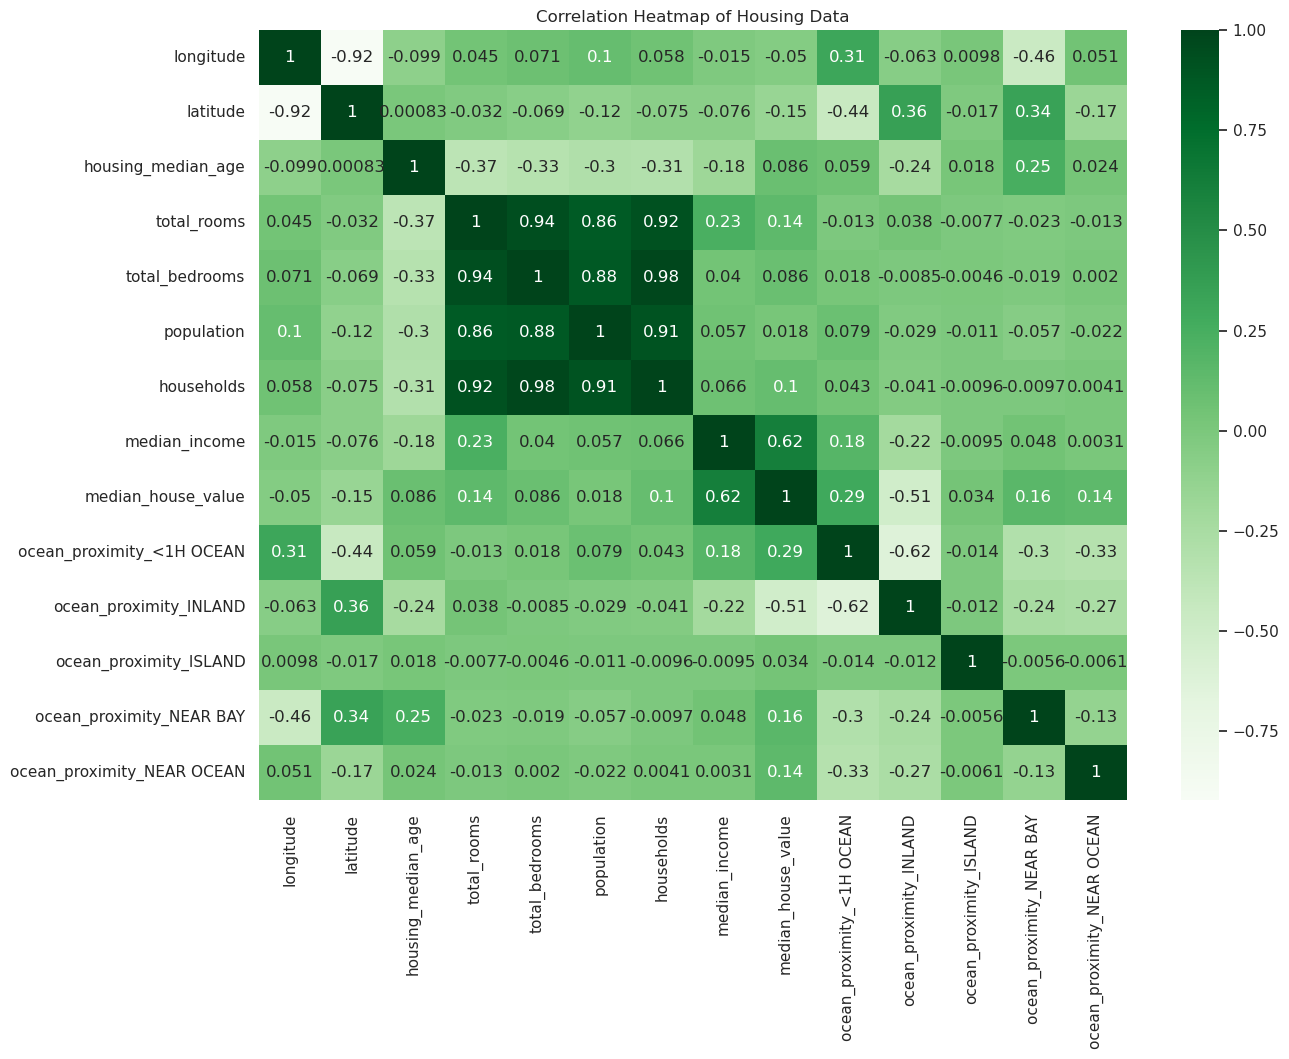

In [108]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()


In [109]:
data = data.drop('total_bedrooms', axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

##Splitting the Data into Train/Test

In [111]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
            'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN',
            'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = 'median_house_value'
X = data[features]
y = data[target]

In [112]:
#Split the data into training set and a testing set
#test_size specifies the proportion of the dataset to include in the test split
#random_state ensures that the same split is used every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


##Training

In [117]:
# Adding a constant to the predictors
X_train_const = sm.add_constant(X_train)

# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Print the summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1988.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:43:00   Log-Likelihood:            -1.8885e+05
No. Observations:               15220   AIC:                         3.777e+05
Df Residuals:                   15208   BIC:                         3.778e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##Prediction/Testing

In [120]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions


2248     166889.526066
20302    269188.605689
1022      48578.828476
337      165061.685961
9097     204882.085938
             ...      
1791     174968.579138
9248     148681.134732
16302    168979.701527
4519     135790.526503
5523     200012.869877
Length: 3806, dtype: float64

##Checking OLS Assumptions

###Assumption 1: Linearity

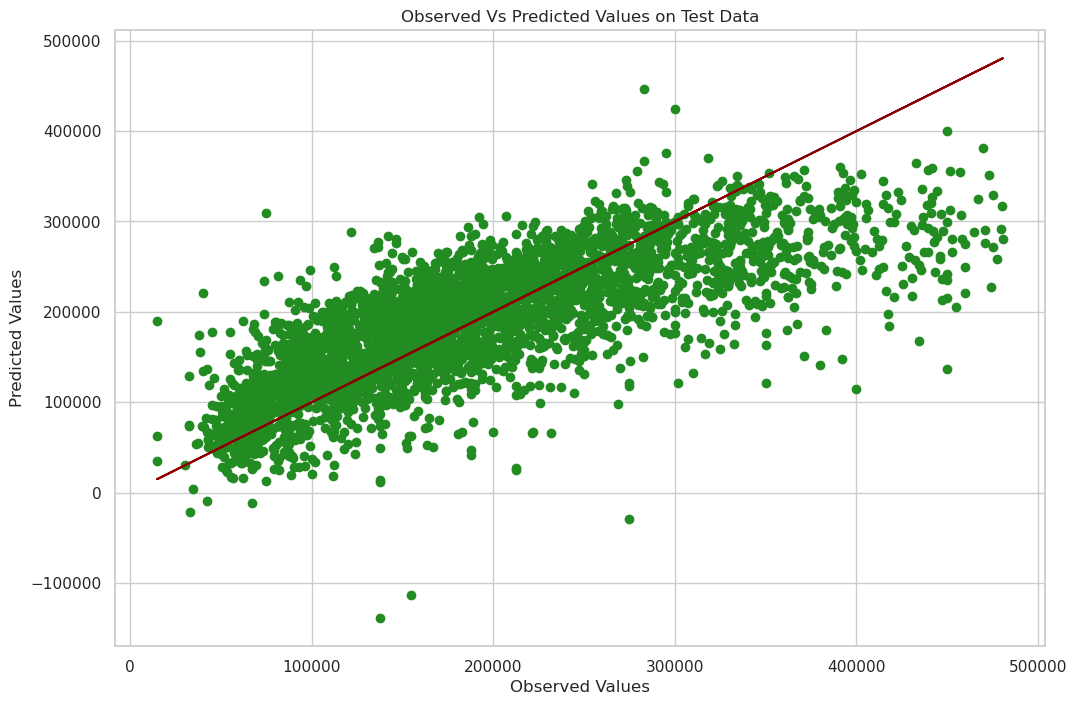

In [122]:
# Scatter plot for observed vs predicted values on test data
plt.figure(figsize=(12,8))
plt.scatter(y_test, test_predictions, color='forestgreen')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed Vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # Line for perfect prediction(True values)
plt.show()

Positive Linear Relationship: The red line(Which represents a perfect prediction line) and the distribution of the data points suggest there's a
positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also
increase, which is a good sign for linearity.

###Assumption 2: Random Sample

In [124]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)
print(f'The mean of the residuals is: {np.round(mean_residuals, 2)}')

The mean of the residuals is: -0.0


Text

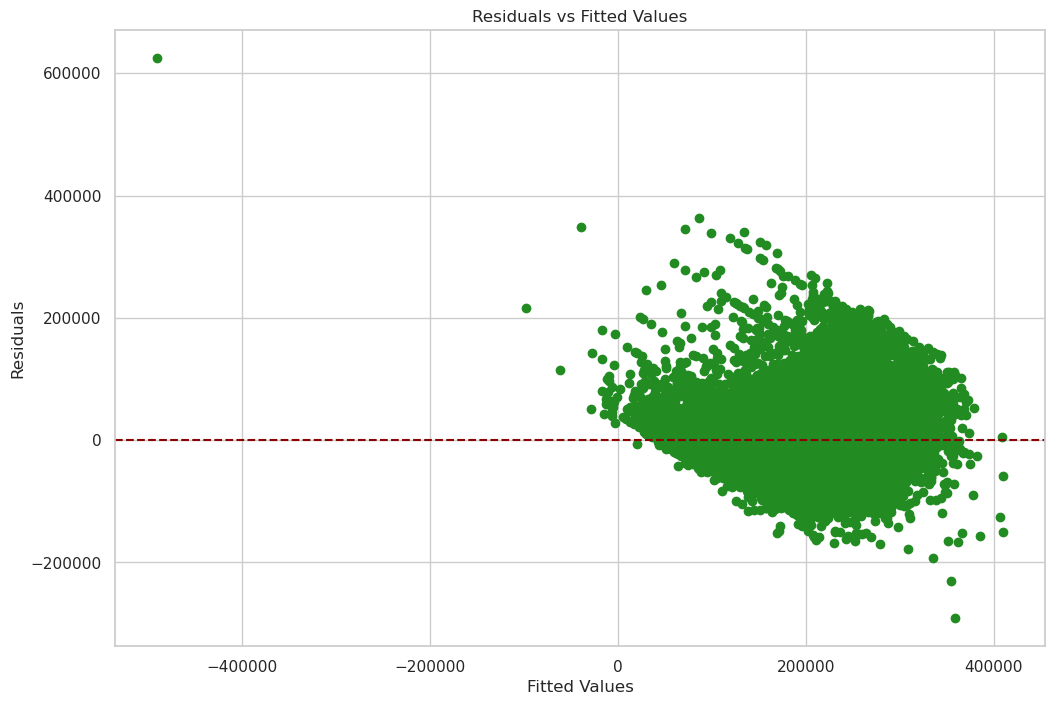

In [126]:
# Plotting the residuals
plt.figure(figsize=(12,8))
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='darkred', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

###Assumption 3: Exogeneity

In [127]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals na {column}: {np.round(corr_coefficient, 2)}')

Correlation between residuals na longitude: 0.0
Correlation between residuals na latitude: -0.0
Correlation between residuals na housing_median_age: 0.0
Correlation between residuals na total_rooms: -0.0
Correlation between residuals na population: -0.0
Correlation between residuals na households: -0.0
Correlation between residuals na median_income: -0.0
Correlation between residuals na ocean_proximity_<1H OCEAN: 0.0
Correlation between residuals na ocean_proximity_INLAND: 0.0
Correlation between residuals na ocean_proximity_NEAR BAY: -0.0
Correlation between residuals na ocean_proximity_NEAR OCEAN: -0.0


Assumption 4: Homoskedasticty

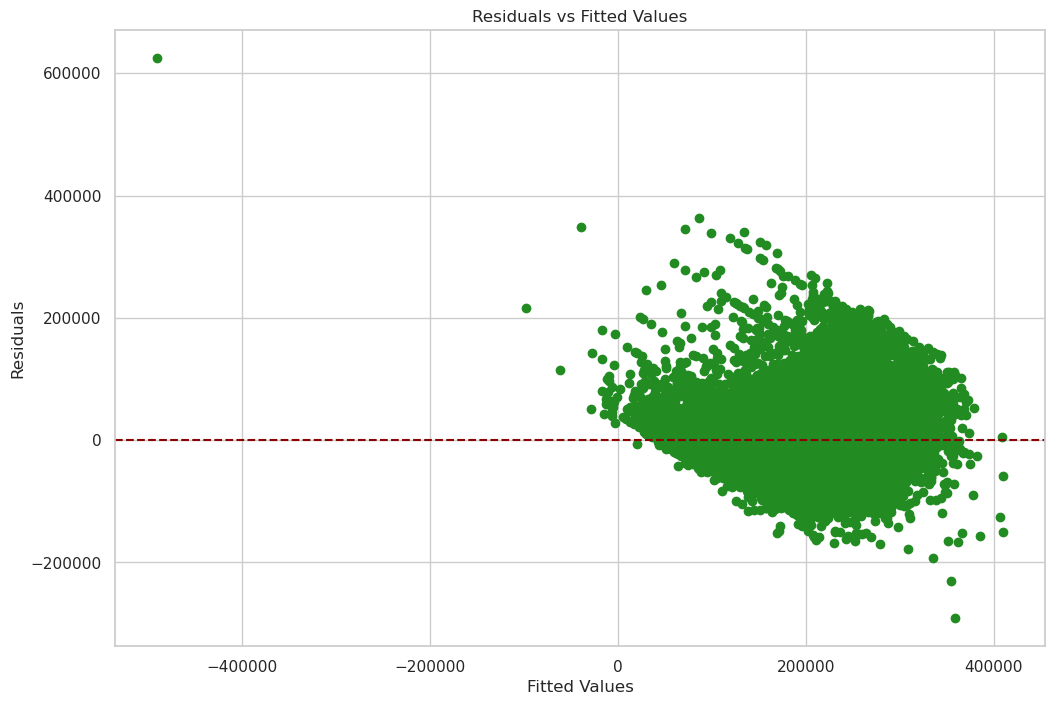

In [129]:
# Plotting the residuals
plt.figure(figsize=(12,8))
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = 'forestgreen')
plt.axhline(y=0, color='darkred', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

##Train/Test/Evaluation with Sklearn

###Scaling the data

In [132]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [133]:
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

In [134]:
# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [136]:
# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test_scaled)

In [137]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

In [138]:
# Output the perfomance metrics
print(f'MSE on test Set: {mse}')
print(f'RMSE on test Set: {rmse}')

MSE on test Set: 3405501315.7890306
RMSE on test Set: 58356.673275547764


In [141]:
print(y_pred)

[166889.52606639 269188.60568884  48578.82847573 ... 168979.70152672
 135790.52650339 200012.8698766 ]
